In [1]:
import pandas as pd
from __future__ import division
import math
import datetime
import numpy as np
import scipy as sc
import pylab as pl
import matplotlib as mpl

import os
import xlrd
import xlsxwriter


import scipy.stats
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
mpl.pyplot.style.use('ggplot')
mpl.rcParams['font.family'] = ['Bitstream Vera Sans']

In [3]:
StudyName = 'fMRI'

In [4]:
# in order to load all the filenames in a list: "ls -1 > filenames.txt" in ubuntu bash
# use this in cleand_data!

filenames = pd.read_csv('/home/albert/Doctoral_project/StroopExperiment/EEG_Stroop/filenames.txt', sep=" ", header = None)
filenames.columns=['FileNames']
filenames.head()
#filenames.select_dtypes(include=['object']).apply(str())
filenames.head()
filenames.astype('S32')
FileNameList = []
for i in range (0,len(filenames)): 
  if 'csv' in filenames.FileNames[i]:
    FileNameList.append(filenames.FileNames[i])


In [6]:
chunks = []

# Essentially every single df which is read from the csv files is being appended
#to the chunks list which in the next cell is being put into one big dataframe

for i in range(0,len(FileNameList)):
  if StudyName in FileNameList[i]:
      df = pd.read_csv('/home/albert/Doctoral_project/StroopExperiment/EEG_Stroop/'+FileNameList[i] 
               
                 ,parse_dates={'datetime':[1,2]}, error_bad_lines=False)
      df.columns = ['corrAns+Color','TrialType','Signal','RowNum','Word','NofPractice','delete','NofPractice2','delete2',
              'delete3','delete4','delete5','delete6','delete7','NofTrial2','NofTrial','NofTrial3','delete','Response','RT'
                    ,'date','Framerate','Experiment','participant','ExperimentTitle','session']
      df = df.iloc[:, [0,1,3,4,15,18,19,20,21,22,23]]




      chunks.append(df)




# DataFrame now holds all data 
DataFrameComplete  = pd.concat(chunks, ignore_index=True)
DataFrameComplete =  DataFrameComplete.loc[DataFrameComplete.NofTrial.isnull() != True]

print(DataFrameComplete.tail())


                                         corrAns+Color  TrialType  RowNum  \
597  2.0 [0.5904624419653648, -0.35540782668412696,...  congruent     0.0   
598  2.0 [0.5904624419653648, -0.35540782668412696,...  congruent     0.0   
599  2.0 [0.5904624419653648, -0.35540782668412696,...  congruent     0.0   
600  4.0 [-0.6443487062397026, -0.04593565844132552...  congruent     8.0   
601  4.0 [-0.6443487062397026, -0.04593565844132552...  congruent     8.0   

     Word  NofTrial  Response        RT              date  Framerate  \
597   ROT     595.0       2.0  0.496060  2017_Okt_06_1534  60.102652   
598   ROT     596.0       2.0  0.500110  2017_Okt_06_1534  60.102652   
599   ROT     597.0       2.0  0.400114  2017_Okt_06_1534  60.102652   
600  BLAU     598.0       3.0  0.715088  2017_Okt_06_1534  60.102652   
601  BLAU     599.0       4.0  0.449842  2017_Okt_06_1534  60.102652   

    Experiment   participant  
597     Stroop  threecolours  
598     Stroop  threecolours  
599     Str

In [7]:
DataFrameComplete = DataFrameComplete.dropna( axis=0, how='any', thresh=None)


In [8]:
print(DataFrameComplete.dtypes)
DataFrameComplete.columns
DataFrameComplete.participant

corrAns+Color     object
TrialType         object
RowNum           float64
Word              object
NofTrial         float64
Response         float64
RT               float64
date              object
Framerate        float64
Experiment        object
participant       object
dtype: object


2      threecolours
3      threecolours
4      threecolours
5      threecolours
6      threecolours
7      threecolours
8      threecolours
9      threecolours
10     threecolours
11     threecolours
12     threecolours
13     threecolours
14     threecolours
15     threecolours
16     threecolours
17     threecolours
18     threecolours
19     threecolours
20     threecolours
21     threecolours
22     threecolours
23     threecolours
24     threecolours
25     threecolours
26     threecolours
27     threecolours
28     threecolours
29     threecolours
30     threecolours
31     threecolours
           ...     
572    threecolours
573    threecolours
574    threecolours
575    threecolours
576    threecolours
577    threecolours
578    threecolours
579    threecolours
580    threecolours
581    threecolours
582    threecolours
583    threecolours
584    threecolours
585    threecolours
586    threecolours
587    threecolours
588    threecolours
589    threecolours
590    threecolours


In [9]:
DataFrameComplete[DataFrameComplete.participant == 'threecolours']

corrAns+Color    TrialType  RowNum  \
2    3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
3    4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
4    2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
5    3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
6    4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
7    3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
8    2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     6.0   
9    4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
10   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
11   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
12   3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
13   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     6.0   
14   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
15   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
16   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     6.0   
17   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
18   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
19   4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
20   4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
21   4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
22   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
23   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
24   3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
25   2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
26   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
27   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
28   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
29   2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
30   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
31   3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
..                                                 ...          ...     ...   
572  3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
573  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
574  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
575  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
576  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
577  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
578  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
579  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
580  3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
581  2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
582  2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
583  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
584  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
585  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
586  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
587  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
588  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
589  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
590  3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
591  4.0 [-0

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn.apionly as sns
% matplotlib inline
import importlib
import seaborn
importlib.reload(seaborn);
DataFrameComplete.head()


corrAns+Color    TrialType  RowNum  \
2  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
3  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
4  2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
5  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
6  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   

   Word  NofTrial  Response        RT              date  Framerate Experiment  \
2  GRÜN       0.0       4.0  0.691297  2017_Okt_06_1534  60.102652     Stroop   
3  BLAU       1.0       4.0  0.582550  2017_Okt_06_1534  60.102652     Stroop   
4  GRÜN       2.0       2.0  0.461933  2017_Okt_06_1534  60.102652     Stroop   
5  GRÜN       3.0       3.0  0.699916  2017_Okt_06_1534  60.102652     Stroop   
6   ROT       4.0       4.0  0.465658  2017_Okt_06_1534  60.102652     Stroop   

    participant  
2  threecolours  
3  threecolours  
4  threecolours  
5  threecolours  
6  threecolours

In [11]:
# order the trials into high-conflict, low-conflict trials
DataFrameComplete = DataFrameComplete.assign(ConflictLevel = 'undefined')

#Sorting into High-High-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) == 'incongruent')  &
                      (DataFrameComplete.TrialType.shift(0) == 'incongruent'), 'ConflictLevel'] = 'HH'

#Sorting into High-Low-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) == 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) != 'incongruent'), 'ConflictLevel'] = 'HL'

#Sorting into Low-High-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) != 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) == 'incongruent'), 'ConflictLevel'] = 'LH'

#Sorting into Low-Low-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) != 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) != 'incongruent'), 'ConflictLevel'] = 'LL'

# First trial



#DataFrameComplete.loc[DataFrameComplete.TrialType.shift(1) != 'incongruent', 'ConflictLevel'] = 'jetztmalwasanderes'


DataFrameComplete.iloc[0:700,:]


corrAns+Color    TrialType  RowNum  \
2    3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
3    4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
4    2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
5    3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
6    4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
7    3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
8    2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     6.0   
9    4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
10   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
11   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
12   3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
13   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     6.0   
14   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
15   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
16   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     6.0   
17   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
18   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
19   4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
20   4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
21   4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
22   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
23   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
24   3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
25   2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
26   4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
27   2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
28   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
29   2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
30   3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     1.0   
31   3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
..                                                 ...          ...     ...   
572  3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
573  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
574  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
575  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
576  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
577  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
578  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
579  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent     8.0   
580  3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
581  2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
582  2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent     3.0   
583  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
584  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     2.0   
585  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent     4.0   
586  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent     5.0   
587  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
588  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
589  2.0 [0.5904624419653648, -0.35540782668412696,...    congruent     0.0   
590  3.0 [-0.3807026148931639, 0.061754438589521454...  incongruent     7.0   
591  4.0 [-0

In [12]:
# deletes all trials in which no RT was recorded aka as no answer was given

DataFrameComplete = DataFrameComplete[np.isfinite(DataFrameComplete['RT'])]

# this table should be empty as all NaN trials are eliminated
DataFrameComplete[np.isnan(DataFrameComplete["RT"])]


Empty DataFrame
Columns: [corrAns+Color, TrialType, RowNum, Word, NofTrial, Response, RT, date, Framerate, Experiment, participant, ConflictLevel]
Index: []

In [13]:
DataFrameComplete = DataFrameComplete.assign(Datum = 'undefined')
DateDict = {'Jan': '01','Feb':'02','Mar':'03','Apr':'04','Mai': '05', 'Jun': '06', 'Jul': '07', 'Aug':'08', 'Sep': '09',
           'Okt': '10', 'Nov': '11', 'Dez': '12'}

for i in range(0,len(DataFrameComplete)):
    
  Date = DataFrameComplete.date.iloc[i]
  year = Date[0:4] 
  month = Date[5:8]
  day = Date[9:11]




  Datum = int(year + DateDict[month] + day )
  DataFrameComplete.iloc[i,12] = Datum
    


In [53]:

# Makes new Panda series to see which session was first (learned first)
DataFrameComplete = DataFrameComplete.assign(LearningDay = 'undefined')


# makes list of all availables subject numbers
forlooplist = []
for i in range(0,100):
    if any( DataFrameComplete.participant == (StudyName + '-' + str(i)) ):
        forlooplist.append(i)

        
# loops through all subjects        
for i in forlooplist: 
# the if structure gives every session a chronological number
  if DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session == 'sham_Day1')].Datum.iloc[0] < DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session == 'verum_Day1')].Datum.iloc[0]: 
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day1'), 'LearningDay'] = 1
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day2'), 'LearningDay'] = 2
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day1'), 'LearningDay'] = 3
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day2'), 'LearningDay'] = 4    
  else:
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day1'), 'LearningDay'] = 3
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day2'), 'LearningDay'] = 4
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day1'), 'LearningDay'] = 1
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day2'), 'LearningDay'] = 2  
#DataFrameComplete.loc[(DataFrameComplete.participant == participant) & (DataFrameComplete.session == 'sham_Day1')].Datum.iloc[0]


#DataFrameComplete.tail()
DataFrameComplete['LearningDay'].value_counts()
DataFrameComplete.tail()

TrialType  RowNum  Word  NofTrial   ITI  Correctness        RT  \
3451    congruent     4.0  GRÜN     595.0  33.0          1.0  0.817569   
3452  incongruent     5.0  GRÜN     596.0  29.0          1.0  0.734148   
3453  incongruent     3.0  GRÜN     597.0  31.0          1.0  0.666734   
3454    congruent     8.0  BLAU     598.0  25.0          1.0  0.650599   
3455    congruent     4.0  GRÜN     599.0  28.0          1.0  0.483683   

                  date  FrameRate ExperimentTitle  session participant  \
3451  2017_Aug_23_1245  59.876971          Stroop        1   EEGPILOT1   
3452  2017_Aug_23_1245  59.876971          Stroop        1   EEGPILOT1   
3453  2017_Aug_23_1245  59.876971          Stroop        1   EEGPILOT1   
3454  2017_Aug_23_1245  59.876971          Stroop        1   EEGPILOT1   
3455  2017_Aug_23_1245  59.876971          Stroop        1   EEGPILOT1   

     ConflictLevel      Datum LearningDay  
3451      20170823  undefined   undefined  
3452      20170823  undefined   undefined  
3453      20170823  undefined   undefined  
3454      20170823  undefined   undefined  
3455      20170823  undefined   undefined

In [14]:
DataFrameComplete.loc[DataFrameComplete.RowNum == 0.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 3.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 6.0, 'RowNum'] = 'RED'

DataFrameComplete.loc[DataFrameComplete.RowNum == 1.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 4.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 7.0, 'RowNum'] = 'GREEN'

DataFrameComplete.loc[DataFrameComplete.RowNum == 2.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 5.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 8.0, 'RowNum'] = 'BLUE'

DataFrameComplete.head()

corrAns+Color    TrialType RowNum  \
2  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent  GREEN   
3  4.0 [-0.6443487062397026, -0.04593565844132552...    congruent   BLUE   
4  2.0 [0.5904624419653648, -0.35540782668412696,...  incongruent    RED   
5  3.0 [-0.3807026148931639, 0.061754438589521454...    congruent  GREEN   
6  4.0 [-0.6443487062397026, -0.04593565844132552...  incongruent   BLUE   

   Word  NofTrial  Response        RT              date  Framerate Experiment  \
2  GRÜN       0.0       4.0  0.691297  2017_Okt_06_1534  60.102652     Stroop   
3  BLAU       1.0       4.0  0.582550  2017_Okt_06_1534  60.102652     Stroop   
4  GRÜN       2.0       2.0  0.461933  2017_Okt_06_1534  60.102652     Stroop   
5  GRÜN       3.0       3.0  0.699916  2017_Okt_06_1534  60.102652     Stroop   
6   ROT       4.0       4.0  0.465658  2017_Okt_06_1534  60.102652     Stroop   

    participant ConflictLevel     Datum  
2  threecolours            LL  20171006  
3  threecolours            LL  20171006  
4  threecolours            LH  20171006  
5  threecolours            HL  20171006  
6  threecolours            LH  20171006

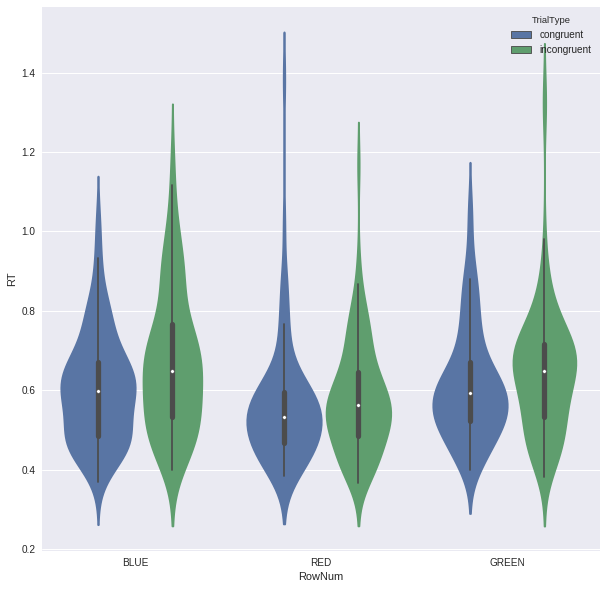

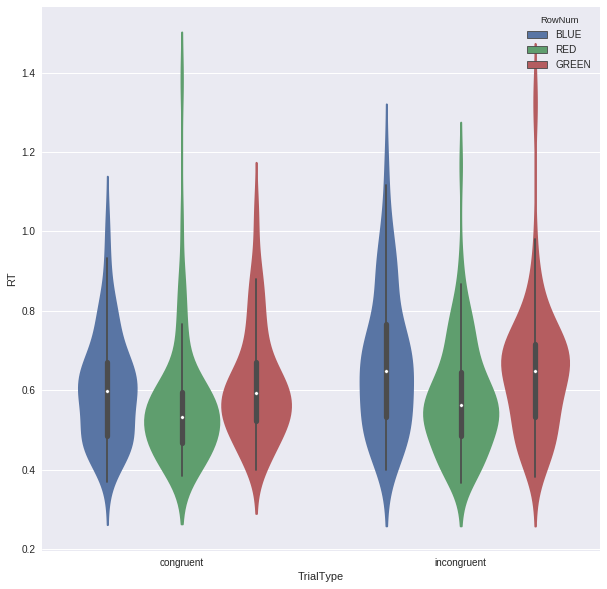

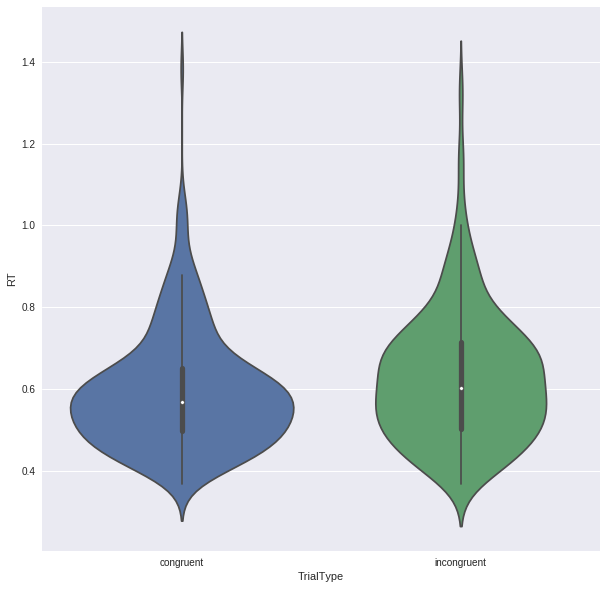

In [16]:
plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "RowNum", hue ='TrialType', data = DataFrameComplete[DataFrameComplete.participant == 'threecolours'], 
            order=['BLUE','RED','GREEN'] ,hue_order = ['congruent','incongruent'], 
           );

plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "TrialType", hue ='RowNum', data = DataFrameComplete[DataFrameComplete.participant == 'threecolours'], 
            order=['congruent','incongruent'] ,hue_order = ['BLUE','RED','GREEN'], 
           );

plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "TrialType", data = DataFrameComplete[DataFrameComplete.participant == 'threecolours'], 
            order=['congruent','incongruent'], 
           );
    


In [56]:
len(DataFrameComplete.loc[(DataFrameComplete.participant == 'EEGPILOT1') & (DataFrameComplete.RT > 1.2)])

14

In [19]:
DataFrameComplete[(DataFrameComplete.date == '2017_Okt_06_1534')&(DataFrameComplete.TrialType == 'incongruent')  ].RT.mean()

0.62890101664546672

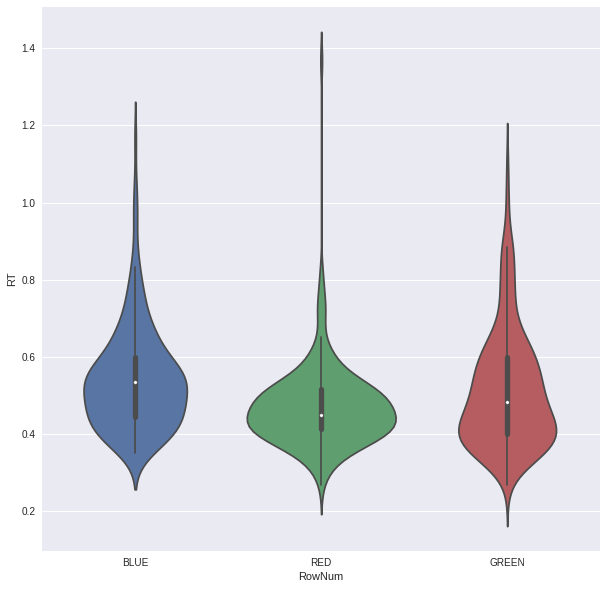

In [58]:
plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "RowNum", data = DataFrameComplete[DataFrameComplete.participant == 'E'], 
            order=['BLUE','RED','GREEN'] ,
           );

TrialType RowNum   Word  NofTrial   ITI  Correctness        RT  \
102    congruent    RED    RED       0.0  26.0          1.0  0.717548   
103    congruent  GREEN  GREEN       1.0  25.0          0.0  0.634069   
104  incongruent   BLUE  GREEN       2.0  31.0          1.0  0.767547   
105  incongruent    RED   BLUE       3.0  25.0          1.0  0.500408   
106    congruent  GREEN  GREEN       4.0  27.0          1.0  0.616921   

                 date  FrameRate ExperimentTitle  session participant  \
102  2017_Aug_18_1400  59.817196          Stroop        1           E   
103  2017_Aug_18_1400  59.817196          Stroop        1           E   
104  2017_Aug_18_1400  59.817196          Stroop        1           E   
105  2017_Aug_18_1400  59.817196          Stroop        1           E   
106  2017_Aug_18_1400  59.817196          Stroop        1           E   

    ConflictLevel      Datum LearningDay  
102      20170818  undefined   undefined  
103      20170818  undefined   undefined  
104      20170818  undefined   undefined  
105      20170818  undefined   undefined  
106      20170818  undefined   undefined

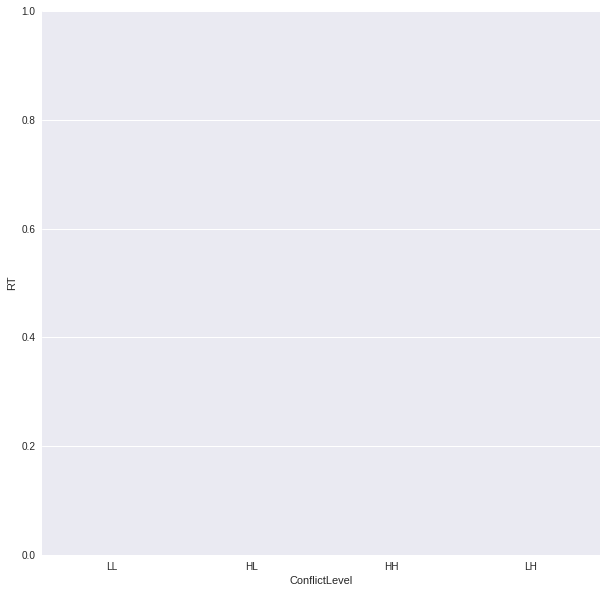

In [59]:
plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "ConflictLevel", data = DataFrameComplete[DataFrameComplete.participant == 'EEGPILOT1'], 
            order=['LL','HL','HH','LH',] , 
           );
DataFrameComplete.head()

In [64]:
# differentes between HL, LL, HH, LH

minuendHL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HL')]["RT"].mean()

subtrahendHL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HL') ]["RT"].mean()
difference = minuendHL - subtrahendHL
print('HL - difference between tacs - sham',difference)

minuendLH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LH')]["RT"].mean()

subtrahendLH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LH') ]["RT"].mean()
difference = minuendLH - subtrahendLH
print('LHverumSham',difference)

print('verum stimulation LH',minuendLH)

print('sham stimulation LH',subtrahendLH)

minuendHH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HH')]["RT"].mean()

subtrahendHH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HH')]["RT"].mean()
difference = minuendHH - subtrahendHH
print('HHverumSham',difference)

minuendLL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LL')]["RT"].mean()

subtrahendLL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LL')]["RT"].mean()
difference = minuendLL - subtrahendLL
print('LL - difference between tacs - sham',difference)

print('verum stimulation HH',minuendHH)

print('sham stimulation HH',subtrahendHH)

incongruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent')  
                                    ]["RT"].mean()



print ('incongruentVerum', incongruentVerum)

congruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  ]["RT"].mean()



print ('congruentVerum', congruentVerum)

print(minuendHH, minuendHL)
print ('Conflict detection cI - cC: tacs:', minuendLH - minuendLL )
print ('Conflict adaptation iI - iC: tacs:', minuendHH - minuendHL)
print ('LH - HH', minuendLH, minuendHH, minuendLH - minuendHH)
print ('HL - LL', minuendHL, minuendLL, minuendHL - minuendLL)
# congruency sequence effect: [cI - CC]-[iI iC]
print ('congruency sequence effect tacs' , (minuendLH - minuendLL) - (minuendHH - minuendHL))
print ('congruency sequence effect sham' , (subtrahendLH - subtrahendLL) - (subtrahendHH - subtrahendHL))


HL - difference between tacs - sham nan
LHverumSham nan
verum stimulation LH nan
sham stimulation LH nan
HHverumSham nan
LL - difference between tacs - sham nan
verum stimulation HH nan
sham stimulation HH nan
incongruentVerum 0.666308217065
congruentVerum 0.666308217065
nan nan
Conflict detection cI - cC: tacs: nan
Conflict adaptation iI - iC: tacs: nan
LH - HH nan nan nan
HL - LL nan nan nan
congruency sequence effect tacs nan
congruency sequence effect sham nan


In [65]:
minuendHL = DataFrameComplete[ (DataFrameComplete["TrialType"] == 'congruent' )   &
                               (DataFrameComplete["ConflictLevel"] == 'HL')]["RT"].mean()

In [66]:
minuendHH  

nan

In [67]:
minuendHL

nan

In [68]:
print(DataFrameComplete[(DataFrameComplete.RowNum == 'RED') &
                       (DataFrameComplete.participant == 'A')]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'GREEN') &
                       (DataFrameComplete.participant == 'A')]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'BLUE') &
                       (DataFrameComplete.participant == 'A')]['RT'].mean())

0.629082924128
0.713237088919
0.694212969184


In [69]:
print(DataFrameComplete[(DataFrameComplete.RowNum == 'RED') 
                       ]['RT'].mean())

print(DataFrameComplete[(DataFrameComplete.RowNum == 'GREEN') 
                       ]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'BLUE') 
                       ]['RT'].mean())
DataFrameComplete.head()

0.659430062436
0.717117574081
0.745873250536


TrialType RowNum   Word  NofTrial   ITI  Correctness        RT  \
102    congruent    RED    RED       0.0  26.0          1.0  0.717548   
103    congruent  GREEN  GREEN       1.0  25.0          0.0  0.634069   
104  incongruent   BLUE  GREEN       2.0  31.0          1.0  0.767547   
105  incongruent    RED   BLUE       3.0  25.0          1.0  0.500408   
106    congruent  GREEN  GREEN       4.0  27.0          1.0  0.616921   

                 date  FrameRate ExperimentTitle  session participant  \
102  2017_Aug_18_1400  59.817196          Stroop        1           E   
103  2017_Aug_18_1400  59.817196          Stroop        1           E   
104  2017_Aug_18_1400  59.817196          Stroop        1           E   
105  2017_Aug_18_1400  59.817196          Stroop        1           E   
106  2017_Aug_18_1400  59.817196          Stroop        1           E   

    ConflictLevel      Datum LearningDay  
102      20170818  undefined   undefined  
103      20170818  undefined   undefined  
104      20170818  undefined   undefined  
105      20170818  undefined   undefined  
106      20170818  undefined   undefined

In [126]:
# Probandendaten zur DMC einspeisen

Proband = 'I'
#Zielstruktur:
#data structure: 
#data[0]:     number of correct trials
#data[1]:     proportion correct
#data[2:7]:   .1, .3, .5, .7, .9 RT quantiles for correct trials (in ms)
#data[7]:     number of incorrect trials
#data[8]:     proportion of incorrect trials
#data[9:14]:  RT quantiles for incorrect trials (in ms). Because we have a number of errors > 10 in each congruency condition, .1, .3, .5 , .7, .9 RT quantiles are computed

congruent_data = []
NrCorrTrials = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent') & (DataFrameComplete.Correctness == 1.0)]['participant'].count()
RatioCorr = NrCorrTrials / DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent')]['participant'].count()
AllCongCorr = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent') & (DataFrameComplete.Correctness == 1.0)]['RT']

NrInCorrTrials = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent') & (DataFrameComplete.Correctness == 0.0)]['participant'].count()
RatioInCorr = NrInCorrTrials / DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent')]['participant'].count()
AllInCongCorr = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent') & (DataFrameComplete.Correctness == 0.0)]['RT']



congruent_data.append(NrCorrTrials)
congruent_data.append(RatioCorr)
congruent_data.append(AllCongCorr.quantile(q=.1)*1000)
congruent_data.append(AllCongCorr.quantile(q=.3)*1000)
congruent_data.append(AllCongCorr.quantile(q=.5)*1000)
congruent_data.append(AllCongCorr.quantile(q=.7)*1000)
congruent_data.append(AllCongCorr.quantile(q=.9)*1000)

congruent_data.append(NrInCorrTrials)
congruent_data.append(RatioInCorr)
congruent_data.append(AllInCongCorr.quantile(q=.1)*1000)
congruent_data.append(AllInCongCorr.quantile(q=.3)*1000)
congruent_data.append(AllInCongCorr.quantile(q=.5)*1000)
congruent_data.append(AllInCongCorr.quantile(q=.7)*1000)
congruent_data.append(AllInCongCorr.quantile(q=.9)*1000)

print( RatioCorr + RatioInCorr == 1)

incongruent_data = []
NrCorrTrials = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'incongruent') & (DataFrameComplete.Correctness == 1.0)]['participant'].count()
RatioCorr = NrCorrTrials / DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'incongruent')]['participant'].count()
AllCongCorr = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'incongruent') & (DataFrameComplete.Correctness == 1.0)]['RT']

NrInCorrTrials = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'incongruent') & (DataFrameComplete.Correctness == 0.0)]['participant'].count()
RatioInCorr = NrInCorrTrials / DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'incongruent')]['participant'].count()
AllInCongCorr = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'incongruent') & (DataFrameComplete.Correctness == 0.0)]['RT']

incongruent_data.append(NrCorrTrials)
incongruent_data.append(RatioCorr)
incongruent_data.append(AllCongCorr.quantile(q=.1))
incongruent_data.append(AllCongCorr.quantile(q=.3))
incongruent_data.append(AllCongCorr.quantile(q=.5))
incongruent_data.append(AllCongCorr.quantile(q=.7))
incongruent_data.append(AllCongCorr.quantile(q=.9))

incongruent_data.append(NrInCorrTrials)
incongruent_data.append(RatioInCorr)
incongruent_data.append(AllInCongCorr.quantile(q=.1))
incongruent_data.append(AllInCongCorr.quantile(q=.3))
incongruent_data.append(AllInCongCorr.quantile(q=.5))
incongruent_data.append(AllInCongCorr.quantile(q=.7))
incongruent_data.append(AllInCongCorr.quantile(q=.9))



print(RatioCorr + RatioInCorr == 1)


True
True


In [88]:
AllCongCorr = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent') & (DataFrameComplete.Correctness == 1.0)]['RT']

In [104]:
a.quantile(q = 0.100)

0.5005712509152

In [128]:
print(congruent_data)
incongruent_data

[268, 0.89632107023411367, 0.5005712509152, 0.6023377656939, 0.667330980301, 0.7507240056996001, 0.9341481685636, 31, 0.10367892976588629, 0.6005809307100001, 0.684162855148, 0.7342469692229999, 0.8173151016240001, 1.0677480697600001]


[263,
 0.8915254237288136,
 0.5339045047759999,
 0.6507160186766,
 0.7508771419529999,
 0.8841467380526,
 1.067881822586,
 32,
 0.10847457627118644,
 0.5837085962294001,
 0.6273769617081999,
 0.7758790254595,
 0.8842793464663,
 1.0945235014000003]

0.9341481685636